In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
accepted_rides = pd.read_csv('AcceptedRides.csv')
rides = pd.read_csv('Rides.csv')

In [3]:
accepted_rides

,ride_id,driver_id,ride_distance,ride_duration
0,10,10,63,38
1,13,10,73,96
2,7,8,100,28
3,17,7,119,68
4,20,1,121,92
5,5,7,42,101
6,2,4,6,38
7,11,8,37,43
8,15,8,108,82
9,12,8,38,34


In [7]:
rides['requested_at'] = pd.to_datetime(rides['requested_at'])
rides = rides.query("requested_at.dt.year == 2020")
rides['month'] = rides['requested_at'].dt.month
rides

/Users/zw/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ride_id,user_id,requested_at,month
1,1,54,2020-02-09,2
2,10,63,2020-03-04,3
3,19,39,2020-04-06,4
4,3,41,2020-06-03,6
5,13,52,2020-06-22,6
6,7,69,2020-07-16,7
7,17,70,2020-08-25,8
8,20,81,2020-11-02,11
9,5,57,2020-11-09,11
10,2,42,2020-12-09,12


In [9]:
merge = pd.merge(accepted_rides,rides, on ='ride_id').groupby(['month'],as_index = False).agg(
    sum_ride_distance = ('ride_distance','sum'),
    sum_ride_duration = ('ride_duration','sum') 
)
merge

,month,sum_ride_distance,sum_ride_duration
0,3,63,38
1,6,73,96
2,7,100,28
3,8,119,68
4,11,163,193
5,12,6,38


In [5]:
frame = pd.DataFrame({'month':range(1,13)})
frame

,month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [21]:
summary = pd.merge(frame,merge, on = 'month', how = 'left').fillna(0).sort_values(['month'],ascending = [False])
summary['average_ride_distance'] = summary['sum_ride_distance'].rolling(3).mean().fillna(0).round(2)
summary['average_ride_duration'] = summary['sum_ride_duration'].rolling(3).mean().fillna(0).round(2)
summary = summary.query("month <= 10")

res = summary[['month','average_ride_distance','average_ride_duration']].sort_values(['month'])
res

,month,average_ride_distance,average_ride_duration
0,1,21.00,12.67
1,2,21.00,12.67
2,3,21.00,12.67
3,4,24.33,32.00
4,5,57.67,41.33
5,6,97.33,64.00
6,7,73.00,32.00
7,8,39.67,22.67
8,9,54.33,64.33
9,10,56.33,77.00


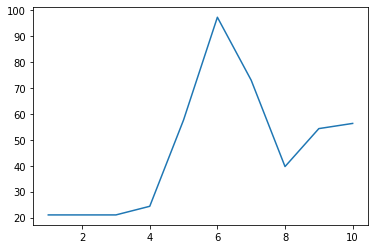

In [22]:
plt.figure()
plt.plot(res['month'],res['average_ride_distance'])
plt.show()